Jon's attempt to classify cells using poorly thought out morphology 

In [4]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
# image recognition
import cv2
from skimage import measure

Let's load a specific set of contours and its respective image

In [3]:
path = "../Results/" + "25.2_10x.jpg/" +  "25.2_10x.jpg.contour_data.pkl"
DF = pandas.read_pickle(path)
contour = DF["contour"]
image_name = DF["image"][0]
image_path = os.path.join("../Data/C3_images/",image_name)
image = cv2.imread(image_path)

FileNotFoundError: [Errno 2] No such file or directory: '../Results/25.2_10x.jpg/25.2_10x.jpg.contour_data.pkl'

Next I am going to visualize a series of potential parameters to use to help distinguish contour types

First let's look at the moments. I don't really know what all of these mean but I think its still good to see if they are differentiable. M00, m10, m01 are perhaps all useful though. These could all be used if we have to turn this into an ML problem.

In [44]:
for i in range(len(contour)):
    M = cv2.moments(contour[i])
    print(M)

{'m00': 548.5, 'm10': 334619.1666666666, 'm01': 1040238.1666666666, 'm20': 204151983.41666666, 'm11': 634614463.7916666, 'm02': 1972874757.4166665, 'm30': 124561819020.75, 'm21': 387182517728.05, 'm12': 1203593152125.5833, 'm03': 3741767818228.6504, 'mu20': 13447.955054223537, 'mu11': 4384.548528909683, 'mu02': 48060.260736465454, 'mu30': -15894.946212768555, 'mu21': -15104.524210564792, 'mu12': 26849.5327456221, 'mu03': 71732.58154296875, 'nu20': 0.044699532924296015, 'nu11': 0.014573760139436162, 'nu02': 0.1597470543646107, 'nu30': -0.002255887734055334, 'nu21': -0.002143707216069904, 'nu12': 0.003810615699807142, 'nu03': 0.0101806353207358}
{'m00': 1337.5, 'm10': 1142019.3333333333, 'm01': 2502702.6666666665, 'm20': 975268878.4166666, 'm11': 2136881448.125, 'm02': 4683148044.083333, 'm30': 833002921584.5, 'm21': 1824831616901.2166, 'm12': 3998531937306.9165, 'm03': 8763542329967.9, 'mu20': 159975.45807909966, 'mu11': -41789.94469833374, 'mu02': 141959.7914133072, 'mu30': 77111.88720

Let's move on to a few things that are more interpretable: area and perimeter and more importantly the ratio of the two (perimeter/area)

In [47]:
perimeters = np.array((len(contour)))
areas = np.array((len(contour)))

for i in range(len(contour)):
    perimeters[i] = cv2.arcLength(contour[i],True)
    areas[i] = cv2.contourArea(contour[i])

IndexError: too many indices for array

In [49]:
len(contour)

339

Here, I just threw some ellipses bounding all the contours, perhaps the shape of these ellipses or the ratio of their areas to the contour's area could be a useful discriminator. I will try this for other shapes also (rectangles?)

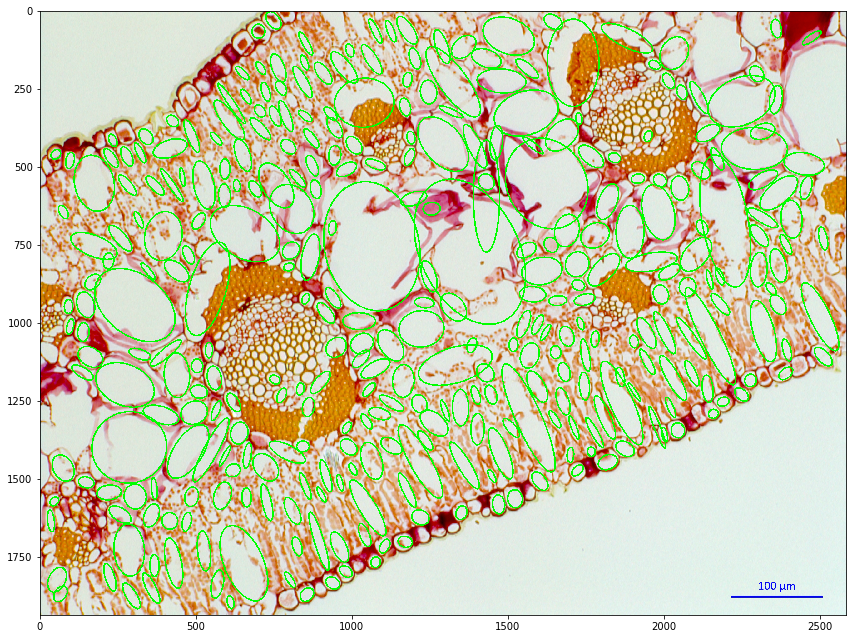

In [42]:
for i in range(len(contour)):
    ellipse = cv2.fitEllipse(contour[i])
    image = cv2.ellipse(image,ellipse,(0,255,0),4)
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(image)
plt.tight_layout()